In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical


In [2]:
import os
from dotenv import load_dotenv

try:
    from google.colab import drive
    # drive.mount('/content/drive')
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('COLAB_DATASET_PATH')
    print("Running in Colab environment")
except ModuleNotFoundError:
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('DATASET_PATH', default='/default/dataset/path')
    print("Running in local environment\n")

Running in local environment



In [3]:
path = f'{DATASET_PATH}/att_faces'

In [4]:
data_face = []
for subject in range(1,41):
    temp = []
    for exp in range(1,11):
        img_path = f'{path}/s{subject}/{exp}.pgm'
        image = plt.imread(img_path)
        temp.append(image)
    data_face.append(temp)
data_face = np.array(data_face)

### Code Breakdown

1. **Initialization:**
   ```python
   data_face = []
   ```
   An empty list named [`data_face`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W3sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A0%7D%7D%5D%2C%22fca3592a-0e2c-4321-8a56-f5441f10fc9b%22%5D "Go to definition") is initialized. This list will eventually hold all the facial images organized by subject and expression.

2. **Outer Loop - Iterating Over Subjects:**
   ```python
   for subject in range(1, 41):
   ```
   The outer loop iterates over a range of subjects, from 1 to 40 inclusive. The [`range`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2F.vscode%2Fextensions%2Fms-python.vscode-pylance-2024.10.1%2Fdist%2Ftypeshed-fallback%2Fstdlib%2Fbuiltins.pyi%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1214%2C%22character%22%3A6%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W3sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A15%7D%7D%5D%2C%22fca3592a-0e2c-4321-8a56-f5441f10fc9b%22%5D "Go to definition") function generates a sequence of numbers, and in this context, it represents the subject IDs.

3. **Inner Loop - Iterating Over Expressions:**
   ```python
   temp = []
   for exp in range(1, 11):
   ```
   For each subject, an empty list named [`temp`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W3sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A4%7D%7D%5D%2C%22fca3592a-0e2c-4321-8a56-f5441f10fc9b%22%5D "Go to definition") is initialized to hold the images for that subject. The inner loop iterates over a range of expressions, from 1 to 10 inclusive. This loop represents the different expressions or conditions for each subject.

4. **Constructing the Image Path:**
   ```python
   img_path = f'{path}/s{subject}/{exp}.pgm'
   ```
   Within the inner loop, the path to each image file is constructed using an f-string. The [`path`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W3sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A22%7D%7D%5D%2C%22fca3592a-0e2c-4321-8a56-f5441f10fc9b%22%5D "Go to definition") variable (assumed to be defined elsewhere in the script) represents the base directory of the dataset. The constructed path follows the format `{path}/s{subject}/{exp}.pgm`, where `{subject}` and `{exp}` are placeholders for the current subject and expression numbers, respectively.

5. **Reading the Image:**
   ```python
   image = plt.imread(img_path)
   ```
   The [`plt.imread`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W3sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A16%7D%7D%5D%2C%22fca3592a-0e2c-4321-8a56-f5441f10fc9b%22%5D "Go to definition") function from the `matplotlib.pyplot` library is used to read the image file at the constructed path. The image is loaded into a NumPy array named [`image`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W3sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A8%7D%7D%5D%2C%22fca3592a-0e2c-4321-8a56-f5441f10fc9b%22%5D "Go to definition").

6. **Appending the Image to the Temporary List:**
   ```python
   temp.append(image)
   ```
   The loaded image is appended to the [`temp`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W3sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A4%7D%7D%5D%2C%22fca3592a-0e2c-4321-8a56-f5441f10fc9b%22%5D "Go to definition") list, which holds all the images for the current subject.

7. **Appending the Temporary List to the Main List:**
   ```python
   data_face.append(temp)
   ```
   After the inner loop completes (i.e., all expressions for the current subject have been processed), the [`temp`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W3sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A4%7D%7D%5D%2C%22fca3592a-0e2c-4321-8a56-f5441f10fc9b%22%5D "Go to definition") list is appended to the [`data_face`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W3sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A0%7D%7D%5D%2C%22fca3592a-0e2c-4321-8a56-f5441f10fc9b%22%5D "Go to definition") list. This effectively organizes the images by subject, with each entry in [`data_face`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W3sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A0%7D%7D%5D%2C%22fca3592a-0e2c-4321-8a56-f5441f10fc9b%22%5D "Go to definition") corresponding to a subject and containing a list of images for that subject.

8. **Converting the List to a NumPy Array:**
   ```python
   data_face = np.array(data_face)
   ```
   Finally, the [`data_face`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W3sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A0%7D%7D%5D%2C%22fca3592a-0e2c-4321-8a56-f5441f10fc9b%22%5D "Go to definition") list is converted to a NumPy array. This conversion is useful for efficient numerical operations and compatibility with machine learning libraries that often require input data in NumPy array format.

### Summary

The code snippet processes a dataset of facial images, organizing them into a structured format where images are grouped by subject and expression. It uses nested loops to iterate over subjects and expressions, constructs the file paths for the images, reads the images using [`plt.imread`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W3sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A16%7D%7D%5D%2C%22fca3592a-0e2c-4321-8a56-f5441f10fc9b%22%5D "Go to definition"), and stores them in a list. The final list is then converted to a NumPy array for efficient processing. This structured format is essential for tasks such as facial recognition, where the organization of data by subject and expression is crucial for training and evaluating models.

In [5]:
print('number of folders: ', len(data_face))

number of folders:  40


In [6]:
print('number of images per folder', len(data_face[0]))

number of images per folder 10


In [7]:
print('dataset size: ', data_face.shape)

dataset size:  (40, 10, 112, 92)


In [8]:
def show_image(image, n=10):
    plt.figure(figsize=(16,6))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(image[i], cmap='gray')
        plt.axis('off')
    plt.show()

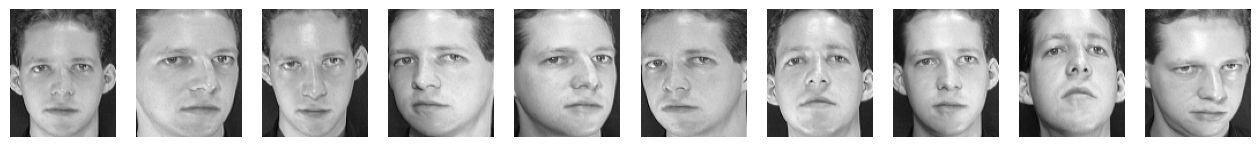

In [9]:
show_image(data_face[0])

In [10]:
num_subjects, num_images_per_subject, image_height, image_width = data_face.shape
x=data_face.reshape((num_subjects*num_images_per_subject, image_height, image_width, 1))
y=np.repeat(np.arange(num_subjects), num_images_per_subject)

The code snippet pre-processes a dataset of facial images, preparing it for training a facial recognition model. The code reshapes the data and creates labels for each image, organizing the dataset into a format suitable for model input.

### Code Breakdown

1. **Extracting Dimensions:**
   ```python
   num_subjects, num_images_per_subject, image_height, image_width = data_face.shape
   ```
   This line extracts the dimensions of the [`data_face`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A66%7D%7D%5D%2C%220be14a2a-2d1a-4f4c-a30a-0fceb8ebdae3%22%5D "Go to definition") array, which contains the facial images. The [`shape`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A76%7D%7D%5D%2C%220be14a2a-2d1a-4f4c-a30a-0fceb8ebdae3%22%5D "Go to definition") attribute of the NumPy array returns a tuple representing the dimensions of the array. In this case, [`data_face`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A66%7D%7D%5D%2C%220be14a2a-2d1a-4f4c-a30a-0fceb8ebdae3%22%5D "Go to definition") has four dimensions:
   - [`num_subjects`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A0%7D%7D%5D%2C%220be14a2a-2d1a-4f4c-a30a-0fceb8ebdae3%22%5D "Go to definition"): The number of subjects in the dataset.
   - [`num_images_per_subject`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A14%7D%7D%5D%2C%220be14a2a-2d1a-4f4c-a30a-0fceb8ebdae3%22%5D "Go to definition"): The number of images per subject.
   - [`image_height`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A38%7D%7D%5D%2C%220be14a2a-2d1a-4f4c-a30a-0fceb8ebdae3%22%5D "Go to definition"): The height of each image.
   - [`image_width`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A52%7D%7D%5D%2C%220be14a2a-2d1a-4f4c-a30a-0fceb8ebdae3%22%5D "Go to definition"): The width of each image.

2. **Reshaping the Data:**
   ```python
   x = data_face.reshape((num_subjects * num_images_per_subject, image_height, image_width, 1))
   ```
   This line reshapes the [`data_face`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A66%7D%7D%5D%2C%220be14a2a-2d1a-4f4c-a30a-0fceb8ebdae3%22%5D "Go to definition") array into a 4D array suitable for input into a convolutional neural network (CNN). The [`reshape`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A12%7D%7D%5D%2C%220be14a2a-2d1a-4f4c-a30a-0fceb8ebdae3%22%5D "Go to definition") method changes the shape of the array without altering its data. The new shape is:
   - `(num_subjects * num_images_per_subject, image_height, image_width, 1)`: This flattens the first two dimensions (subjects and images per subject) into a single dimension, resulting in a 4D array where each image is represented as a separate entry. The last dimension (1) indicates that the images are grayscale (single channel).

3. **Creating Labels:**
   ```python
   y = np.repeat(np.arange(num_subjects), num_images_per_subject)
   ```
   This line creates the labels for each image. The [`np.arange(num_subjects)`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A2%7D%7D%5D%2C%220be14a2a-2d1a-4f4c-a30a-0fceb8ebdae3%22%5D "Go to definition") function generates an array of integers from 0 to [`num_subjects - 1`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A0%7D%7D%5D%2C%220be14a2a-2d1a-4f4c-a30a-0fceb8ebdae3%22%5D "Go to definition"), representing the subject IDs. The [`np.repeat`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A2%7D%7D%5D%2C%220be14a2a-2d1a-4f4c-a30a-0fceb8ebdae3%22%5D "Go to definition") function repeats each subject ID [`num_images_per_subject`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A14%7D%7D%5D%2C%220be14a2a-2d1a-4f4c-a30a-0fceb8ebdae3%22%5D "Go to definition") times, creating a label for each image. The resulting [`y`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A0%7D%7D%5D%2C%220be14a2a-2d1a-4f4c-a30a-0fceb8ebdae3%22%5D "Go to definition") array has a length equal to the total number of images ([`num_subjects * num_images_per_subject`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A0%7D%7D%5D%2C%220be14a2a-2d1a-4f4c-a30a-0fceb8ebdae3%22%5D "Go to definition")), with each entry corresponding to the subject ID of the respective image.

### Summary

The code snippet processes a dataset of facial images, preparing it for machine learning tasks. It first extracts the dimensions of the [`data_face`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X12sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A66%7D%7D%5D%2C%220be14a2a-2d1a-4f4c-a30a-0fceb8ebdae3%22%5D "Go to definition") array, which contains the images. It then reshapes the array into a 4D format suitable for input into a convolutional neural network, where each image is represented as a separate entry with a single channel (grayscale). Finally, it creates labels for each image, with each label corresponding to the subject ID. This structured format is essential for training and evaluating facial recognition models, as it ensures that the data and labels are correctly aligned.

In [11]:
num_subjects*num_images_per_subject

400

In [12]:
num_subjects*num_images_per_subject, image_height

(400, 112)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
# Normalizing the pixel values for model input
x_train = x_train/255
x_test = x_test/255

# # Convert labels to one-hot encoding
# y_train = to_categorical(y_train, num_subjects)
# y_test = to_categorical(y_test, num_subjects)

In [15]:
# Show the size of each set
print(f'Training_set_size: {len(x_train)}')
print(f'Test_set_size: {len(x_test)}')

Training_set_size: 320
Test_set_size: 80


In [16]:
model = Sequential()

model.add(Conv2D(32, 5, 5, input_shape=(112, 92, 1), activation='relu', kernel_regularizer=l2(l2=0.001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

model.add(Conv2D(64, 5, 5, padding='same', activation='relu', kernel_regularizer=l2(l2=0.001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=l2(l2=0.001)))
# model.add(Dropout(0.3))

model.add(Dense(40, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 18, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 9, 32)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 2, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8

The provided code snippet defines a convolutional neural network (CNN) model using the Keras library with the TensorFlow backend. This model is designed for a facial recognition task, where it classifies images into one of 40 possible subjects. Let's break down the code step by step to understand the architecture and components of the model.

**Ways to try and improve model performance:**

- Number of Filters
- Size of Filter
- Try regularization techniques
- Try to add more hidden layers
- Try to modify number of neurons in the hidden layer
- Try to modify the batch size
- Try to modify the number of epochs
- Try to modify augmentation

### Model Initialization

```python
model = Sequential()
```

The model is initialized as a [`Sequential`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A0%7D%7D%5D%2C%22d4ccf5c9-5d90-41e7-ae01-f97096dd068e%22%5D "Go to definition") model, which means that layers will be added to it sequentially.

### First Convolutional Layer

```python
model.add(Conv2D(32, 5, 5, input_shape=(112, 92, 1), activation='relu', kernel_regularizer=l2(l2=0.001)))
```

- **[`Conv2D`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A10%7D%7D%5D%2C%22d4ccf5c9-5d90-41e7-ae01-f97096dd068e%22%5D "Go to definition") Layer:** Adds a 2D convolutional layer with 32 filters, each of size 5x5.
- **[`input_shape=(112, 92, 1)`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A28%7D%7D%5D%2C%22d4ccf5c9-5d90-41e7-ae01-f97096dd068e%22%5D "Go to definition"):** Specifies the input shape of the images, which are 112x92 pixels with a single channel (grayscale).
- **[`activation='relu'`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A49%7D%7D%5D%2C%22d4ccf5c9-5d90-41e7-ae01-f97096dd068e%22%5D "Go to definition"):** Uses the ReLU activation function to introduce non-linearity.
- **[`kernel_regularizer=l2(l2=0.001)`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A71%7D%7D%5D%2C%22d4ccf5c9-5d90-41e7-ae01-f97096dd068e%22%5D "Go to definition"):** Applies L2 regularization to the kernel weights to prevent overfitting.

### First Max Pooling Layer

```python
model.add(MaxPooling2D(pool_size=(2, 2)))
```

- **[`MaxPooling2D`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A0%7D%7D%5D%2C%22d4ccf5c9-5d90-41e7-ae01-f97096dd068e%22%5D "Go to definition") Layer:** Adds a max pooling layer with a pool size of 2x2. This layer reduces the spatial dimensions of the feature maps by taking the maximum value in each 2x2 window, effectively downsampling the input.

### Second Convolutional Layer

```python
model.add(Conv2D(64, 5, 5, padding='same', activation='relu', kernel_regularizer=l2(l2=0.001)))
```

- **[`Conv2D`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A10%7D%7D%5D%2C%22d4ccf5c9-5d90-41e7-ae01-f97096dd068e%22%5D "Go to definition") Layer:** Adds another 2D convolutional layer, this time with 64 filters, each of size 5x5.
- **[`padding='same'`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A28%7D%7D%5D%2C%22d4ccf5c9-5d90-41e7-ae01-f97096dd068e%22%5D "Go to definition"):** Ensures that the output feature maps have the same spatial dimensions as the input by adding zero-padding where necessary.
- **[`activation='relu'`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A49%7D%7D%5D%2C%22d4ccf5c9-5d90-41e7-ae01-f97096dd068e%22%5D "Go to definition"):** Uses the ReLU activation function.
- **[`kernel_regularizer=l2(l2=0.001)`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A71%7D%7D%5D%2C%22d4ccf5c9-5d90-41e7-ae01-f97096dd068e%22%5D "Go to definition"):** Applies L2 regularization to the kernel weights.

### Second Max Pooling Layer

```python
model.add(MaxPooling2D(pool_size=(2, 2)))
```

- **[`MaxPooling2D`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A0%7D%7D%5D%2C%22d4ccf5c9-5d90-41e7-ae01-f97096dd068e%22%5D "Go to definition") Layer:** Adds another max pooling layer with a pool size of 2x2, further reducing the spatial dimensions of the feature maps.

### Flattening Layer

```python
model.add(Flatten())
```

- **[`Flatten`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A0%7D%7D%5D%2C%22d4ccf5c9-5d90-41e7-ae01-f97096dd068e%22%5D "Go to definition") Layer:** Flattens the 2D feature maps into a 1D feature vector, preparing the data for the fully connected layers.

### First Fully Connected Layer

```python
model.add(Dense(128, activation='relu', kernel_regularizer=l2(l2=0.001)))
```

This line adds a fully connected (dense) layer to the model with 128 neurons. The parameters used are:
   - **[`128`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A14%2C%22character%22%3A16%7D%7D%5D%2C%22bfda40ae-1356-46a1-b972-cd55090cfa06%22%5D "Go to definition"):** The number of neurons in the layer.
   - **[`activation='relu'`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A14%2C%22character%22%3A21%7D%7D%5D%2C%22bfda40ae-1356-46a1-b972-cd55090cfa06%22%5D "Go to definition"):** The activation function used is ReLU (Rectified Linear Unit), which introduces non-linearity to the model and helps it learn complex patterns. ReLU is defined as `f(x) = max(0, x)`, meaning it outputs the input directly if it is positive; otherwise, it outputs zero.
   - **[`kernel_regularizer=l2(l2=0.001)`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A14%2C%22character%22%3A40%7D%7D%5D%2C%22bfda40ae-1356-46a1-b972-cd55090cfa06%22%5D "Go to definition"):** L2 regularization is applied to the layer's weights. Regularization helps prevent overfitting by adding a penalty to the loss function based on the magnitude of the weights. The [`l2=0.001`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A14%2C%22character%22%3A59%7D%7D%5D%2C%22bfda40ae-1356-46a1-b972-cd55090cfa06%22%5D "Go to definition") parameter specifies the regularization strength.

### Adding the Output Layer

```python
model.add(Dense(40, activation='softmax'))
```
This line adds the output layer to the model with 40 neurons. The parameters used are:
- **[`40`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A17%2C%22character%22%3A16%7D%7D%5D%2C%22bfda40ae-1356-46a1-b972-cd55090cfa06%22%5D "Go to definition"):** The number of neurons in the layer, which corresponds to the number of classes in the classification task. In this case, it suggests that the model is designed to classify images into 40 different categories (e.g., 40 different subjects in a facial recognition task).
- **[`activation='softmax'`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A14%2C%22character%22%3A21%7D%7D%5D%2C%22bfda40ae-1356-46a1-b972-cd55090cfa06%22%5D "Go to definition"):** The activation function used is Softmax, which is typically used in the output layer of a classification model. Softmax converts the raw output scores (logits) into probabilities, with the sum of all probabilities equal to 1. This makes it suitable for multi-class classification tasks.

`(kernel size * input channels + 1) * number of filters`

The provided formula is used to calculate the number of parameters in a convolutional layer of a neural network. Understanding the number of parameters is crucial for evaluating the complexity and computational requirements of the model. Let's break down the components of the formula and explain how it is derived.

### Formula Breakdown

1. **Kernel Size:**
   ```python
   kernel size
   ```
   The kernel size (or filter size) refers to the dimensions of the convolutional filter. For example, a 3x3 filter has a kernel size of 3x3, which equals 9. The kernel size determines the area of the input image that the filter will cover at each step of the convolution operation.

2. **Input Channels:**
   ```python
   input channels
   ```
   The input channels refer to the number of channels in the input data. For example, a grayscale image has 1 input channel, while a color image (RGB) has 3 input channels. Each filter in the convolutional layer will have a separate set of weights for each input channel.

3. **Number of Filters:**
   ```python
   number of filters
   ```
   The number of filters (or kernels) in the convolutional layer determines how many different feature maps will be produced by the layer. Each filter is responsible for detecting different features in the input data.

4. **Bias Term:**
   ```python
   + 1
   ```
   The `+ 1` term accounts for the bias parameter associated with each filter. Each filter has a single bias term that is added to the result of the convolution operation.

### Putting It All Together

The formula for calculating the number of parameters in a convolutional layer is:

`(kernel size * input channels + 1) * number of filters`

- **`kernel size * input channels`:** This part of the formula calculates the total number of weights for a single filter. Each filter has a weight for each position in the kernel and for each input channel.
- **`+ 1`:** This adds the bias term for each filter.
- **`* number of filters`:** This multiplies the total number of weights and bias terms for a single filter by the number of filters in the layer, giving the total number of parameters in the convolutional layer.

### Example

Suppose we have a convolutional layer with the following specifications:
- Kernel size: 3x3 (which equals 9)
- Input channels: 3 (e.g., an RGB image)
- Number of filters: 32

Using the formula, we can calculate the number of parameters:

```
(3 * 3 * 3 + 1) * 32
= (27 + 1) * 32
= 28 * 32
= 896
```

So, the convolutional layer has 896 parameters.

### Summary

The formula `(kernel size * input channels + 1) * number of filters` is used to calculate the number of parameters in a convolutional layer of a neural network. It takes into account the weights for each position in the kernel and each input channel, as well as the bias term for each filter. Understanding this formula helps in evaluating the complexity and computational requirements of the model, which is essential for designing efficient and effective neural networks.

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
%pip install livelossplot

from livelossplot import PlotLossesKerasTF

Note: you may need to restart the kernel to use updated packages.


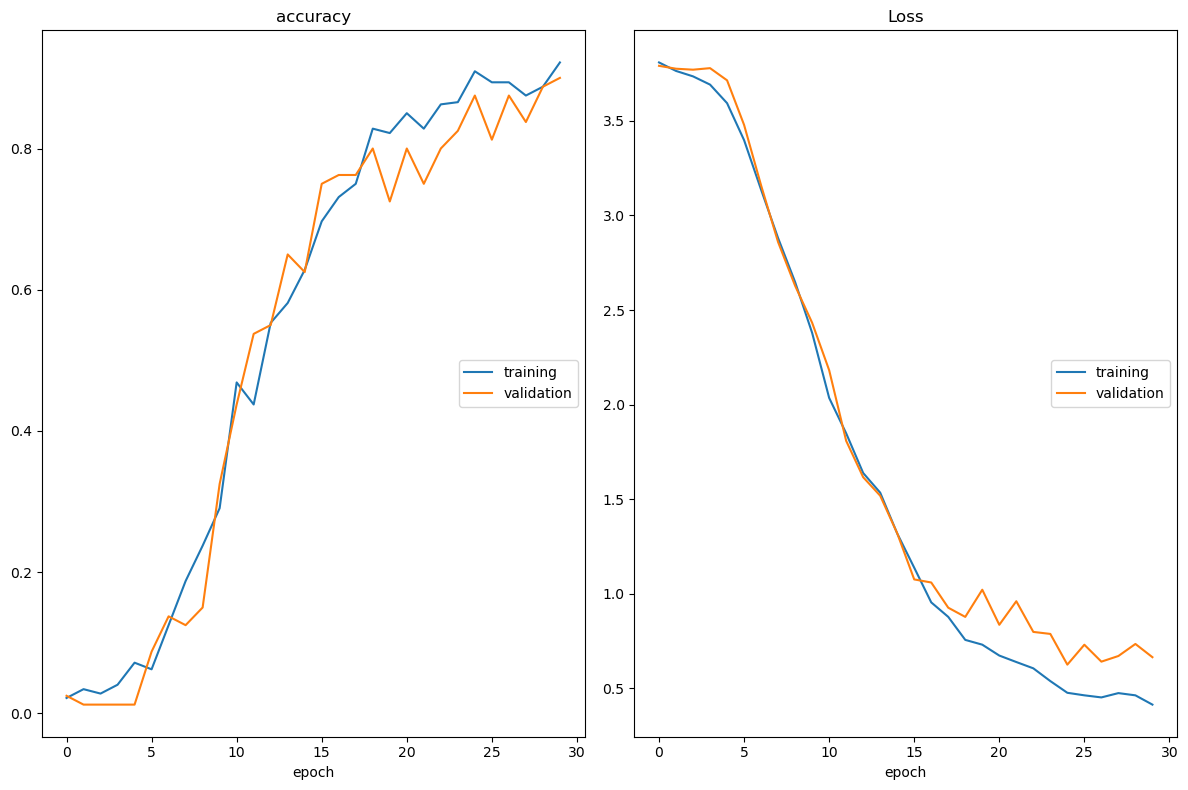

accuracy
	training         	 (min:    0.022, max:    0.922, cur:    0.922)
	validation       	 (min:    0.013, max:    0.900, cur:    0.900)
Loss
	training         	 (min:    0.414, max:    3.809, cur:    0.414)
	validation       	 (min:    0.625, max:    3.791, cur:    0.664)
20/20 [==============================] - 0s 11ms/step - loss: 0.4135 - accuracy: 0.9219 - val_loss: 0.6643 - val_accuracy: 0.9000


In [19]:
model.fit(x_train, y_train, epochs=30, batch_size=16, validation_data=(x_test, y_test), callbacks=[PlotLossesKerasTF()])

The provided code snippet demonstrates how to train a neural network model using the Keras API. The `model.fit` method is used to train the model on the training data, while also validating its performance on a separate validation dataset. This method is a key part of the model training process in Keras, allowing you to specify various parameters and options to control the training behavior.

### Code Breakdown

1. **Training the Model:**
   ```plaintext
   model.fit(x_train, y_train, epochs=20, batch_size=16, validation_data=(x_test, y_test), callbacks=[PlotLossesKerasTF()])
   ```
   The `model.fit` method trains the model for a specified number of epochs on the training data ([`x_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X55sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A10%7D%7D%5D%2C%22f9609000-bb59-4a99-a454-6779b06c8df1%22%5D "Go to definition") and [`y_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X55sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A19%7D%7D%5D%2C%22f9609000-bb59-4a99-a454-6779b06c8df1%22%5D "Go to definition")). The parameters used in this method are:

2. **Parameters:**
   - **[`x_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X55sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A10%7D%7D%5D%2C%22f9609000-bb59-4a99-a454-6779b06c8df1%22%5D "Go to definition") and [`y_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X55sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A19%7D%7D%5D%2C%22f9609000-bb59-4a99-a454-6779b06c8df1%22%5D "Go to definition"):** These are the training data and labels, respectively. [`x_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X55sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A10%7D%7D%5D%2C%22f9609000-bb59-4a99-a454-6779b06c8df1%22%5D "Go to definition") contains the input data (e.g., images), and [`y_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X55sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A19%7D%7D%5D%2C%22f9609000-bb59-4a99-a454-6779b06c8df1%22%5D "Go to definition") contains the corresponding labels (e.g., class labels for each image).
   - **`epochs=20`:** This specifies the number of epochs for which the model will be trained. An epoch is one complete pass through the entire training dataset. In this case, the model will be trained for 20 epochs.
   - **`batch_size=16`:** This specifies the number of samples per gradient update. The training data is divided into batches of 16 samples each, and the model weights are updated after each batch. Using a smaller batch size can lead to more frequent updates and potentially faster convergence, but it may also introduce more noise in the training process.
   - **`validation_data=(x_test, y_test)`:** This specifies the validation data and labels. The model's performance is evaluated on this data at the end of each epoch. [`x_test`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X55sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A71%7D%7D%5D%2C%22f9609000-bb59-4a99-a454-6779b06c8df1%22%5D "Go to definition") contains the validation input data, and [`y_test`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X55sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A79%7D%7D%5D%2C%22f9609000-bb59-4a99-a454-6779b06c8df1%22%5D "Go to definition") contains the corresponding validation labels. This helps monitor the model's performance on unseen data and detect overfitting.
   - **`callbacks=[PlotLossesKerasTF()]`:** This specifies a list of callback functions to be applied during training. In this case, `PlotLossesKerasTF()` is a callback that plots the training and validation loss in real-time. Callbacks are useful for monitoring the training process, implementing early stopping, saving model checkpoints, and more.

### Summary

The `model.fit` method is used to train a neural network model in Keras. It takes the training data and labels, the number of epochs, the batch size, and the validation data as inputs. Additionally, it allows for the use of callbacks to monitor and control the training process. In this example, the model is trained for 20 epochs with a batch size of 16, and its performance is validated on a separate validation dataset. The `PlotLossesKerasTF()` callback is used to plot the training and validation loss in real-time, providing a visual representation of the model's learning progress. This method is essential for training and fine-tuning neural network models in Keras.

In [20]:
# Save the model
model.save('models/custom_faces_cnn.keras')

In [21]:
# Inferencing the model

In [22]:
from keras.models import load_model

model_path = 'models/custom_faces_cnn.keras'
model1 = load_model(model_path)

In [23]:
import cv2
img=cv2.imread(f'{DATASET_PATH}/att_faces/s16/7.pgm', 0)

In [24]:
img.shape

(112, 92)

In [25]:
img = cv2.resize(img, (112, 92))
x=img.reshape(1,112,92,1)

In [26]:
model1.predict(x).argmax(axis=1)

1/1 [==============================] - 0s 40ms/step


array([4])

The provided code snippet demonstrates how to make predictions using a trained neural network model and extract the predicted class labels. This is a common step in the evaluation phase of a machine learning workflow, where you use the trained model to predict the classes of new or unseen data.

### Code Breakdown

1. **Making Predictions:**
   ```plaintext
   model1.predict(x)
   ```
   The `model1.predict(x)` method is used to make predictions on the input data [`x`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X66sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A15%7D%7D%5D%2C%2227d56c4c-39ca-4a9b-b41c-ff5ed770efb8%22%5D "Go to definition") using the trained model `model1`. The [`predict`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X66sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A7%7D%7D%5D%2C%2227d56c4c-39ca-4a9b-b41c-ff5ed770efb8%22%5D "Go to definition") method returns an array of probabilities, where each row corresponds to an input sample and each column corresponds to a class. The value in each cell represents the model's confidence that the input sample belongs to that class.

2. **Extracting Predicted Class Labels:**
   ```plaintext
   .argmax(axis=1)
   ```
   The `argmax(axis=1)` method is applied to the array of probabilities returned by `model1.predict(x)`. The [`argmax`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X66sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A18%7D%7D%5D%2C%2227d56c4c-39ca-4a9b-b41c-ff5ed770efb8%22%5D "Go to definition") function returns the indices of the maximum values along the specified axis. In this case, `axis=1` specifies that the function should find the index of the maximum value in each row. Each row corresponds to an input sample, and the index of the maximum value in a row represents the predicted class label for that sample.

### Example

Suppose the model is trained to classify images into three categories: cats, dogs, and birds. The [`predict`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X66sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A7%7D%7D%5D%2C%2227d56c4c-39ca-4a9b-b41c-ff5ed770efb8%22%5D "Go to definition") method might return an array like this for three input samples:



In [27]:
[[0.1, 0.7, 0.2],
 [0.8, 0.1, 0.1],
 [0.3, 0.4, 0.3]]

[[0.1, 0.7, 0.2], [0.8, 0.1, 0.1], [0.3, 0.4, 0.3]]



Each row represents the model's predicted probabilities for the three classes. Applying `argmax(axis=1)` to this array would return:



In [28]:
[1, 0, 1]

[1, 0, 1]



This means the model predicts the first sample as class 1 (dogs), the second sample as class 0 (cats), and the third sample as class 1 (dogs).

### Summary

The code snippet `model1.predict(x).argmax(axis=1)` is used to make predictions on the input data [`x`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X66sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A15%7D%7D%5D%2C%2227d56c4c-39ca-4a9b-b41c-ff5ed770efb8%22%5D "Go to definition") using the trained model `model1` and extract the predicted class labels. The [`predict`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Ftoddwalters%2FDevelopment%2Frepos%2Fpgaiml%2Faiml-python-coding-examples%2Fadlcv%2Fprojects%2F1697032566_performingFacialFecognitionWithDL%2Fface-recognition.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X66sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A7%7D%7D%5D%2C%2227d56c4c-39ca-4a9b-b41c-ff5ed770efb8%22%5D "Go to definition") method returns an array of probabilities for each class, and the `argmax(axis=1)` method finds the index of the maximum probability in each row, representing the predicted class label for each input sample. This process is essential for evaluating the model's performance and making predictions on new data.